# Classification of iris

### 1) Select features and categorie for practice

In [173]:
# import necessary modul
%matplotlib inline
import numpy as np
import pandas as pd
from operator import itemgetter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import grid_search

from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

# import iris data
from sklearn.datasets import load_iris
iris_dataset = load_iris()
list(iris_dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [2]:
# Check an iris dataset
iris_dataset

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
# mold the array of iris to dataframe
X = pd.DataFrame(np.array(iris_dataset.data)) 

In [4]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# rename the columns
columns_dic = {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

X.rename(columns= columns_dic, inplace=True)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# mold the array to dataframe
Y = pd.DataFrame(np.array(iris_dataset.target)) 

# rename a column
Y = Y.rename(columns = {0:'Species'})

# check the dataset
Y['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [9]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# combine features and categorie
df_iris = X.join(Y)

# check
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
columns_need = ["sepal_length", "petal_length", "Species"]

# generate a dataframe for analyzing iris dataset
df_iris_vv = df_iris[df_iris.Species != 0] # virgicolor and virginica

#
df_train_test = df_iris_vv.loc[:, columns_need]
df_train_test.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


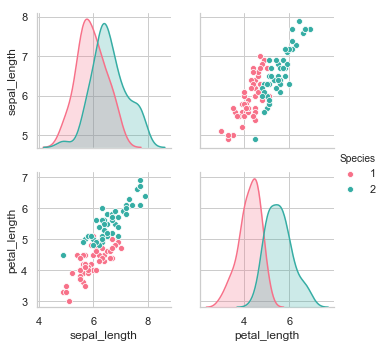

In [12]:
fig = plt.figure(figsize=(15, 15))

sns.pairplot(df_train_test, vars=df_train_test.iloc[:,:2].columns, 
             hue="Species", palette="husl")

### 2) Analysis of the Data

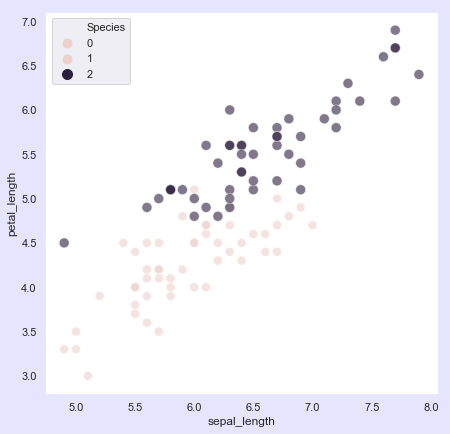

In [13]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(7, 7))
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

# Scatter plot
sns.scatterplot(x="sepal_length", y="petal_length", size='Species', sizes=(80,100),
                alpha=0.6, hue="Species", data=df_train_test)

plt.grid()

In [14]:
df_train_test['Species'].unique()

array([1, 2], dtype=int64)

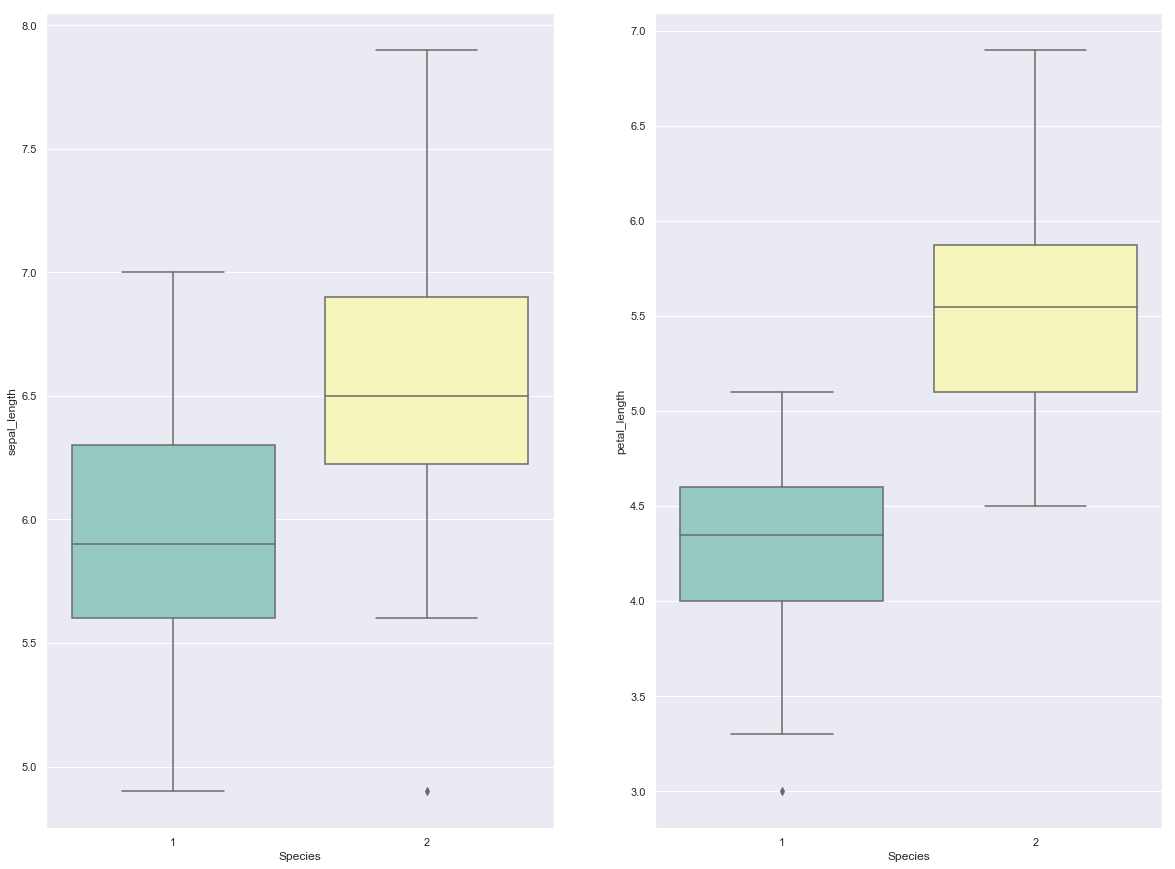

In [15]:
# plot box plot
fig = plt.figure(figsize=(20, 15))
ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(x="Species", y="sepal_length", 
                  data=df_train_test, palette="Set3") 
ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(x="Species", y="petal_length", 
                  data=df_train_test, palette="Set3")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


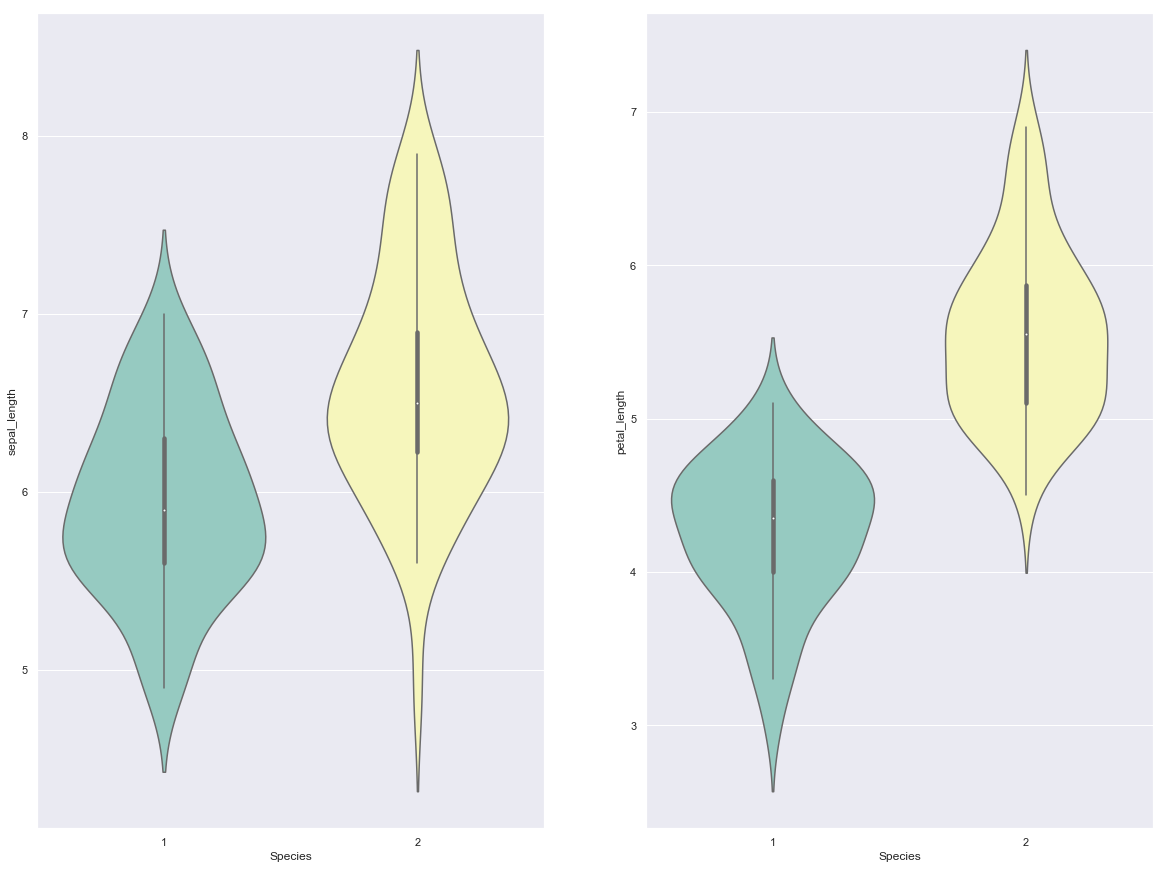

In [16]:
# plot vaiolinplot
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(x="Species", y="sepal_length",
                     data=df_train_test, palette="Set3") 
ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(x="Species", y="petal_length",
                     data=df_train_test, palette="Set3")

In [17]:
# individual variable and non-dividual variable
X = df_train_test.iloc[:, :-1].values # by number/ values --> serries
y = df_train_test.loc[:, "Species"].values # by column's name

In [18]:
# for spliting train and test
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)

In [59]:
# check size
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

70
30
70
30


### 3) Pretreatment / Standardization

In [62]:
from sklearn.preprocessing import StandardScaler
# standalized
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
scaler.mean_

array([6.21428571, 4.90714286])

In [64]:
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.61596259, -1.20467068],
       [ 1.7629274 ,  1.42680853],
       [ 1.61424678,  1.66603392],
       [ 1.01952428,  0.23068162],
       [-1.06200446, -0.60660722],
       [ 0.42480178,  1.06797046],
       [-0.46728196, -0.12815646],
       [-1.06200446, -1.44389606],
       [ 0.12744053,  0.11106893],
       [ 1.31688553,  1.18758315],
       [-0.16992071, -0.24776915],
       [-0.31860134, -1.08505799],
       [ 1.46556615,  1.06797046],
       [-0.31860134, -0.12815646],
       [ 0.72216303, -0.24776915],
       [ 1.46556615,  1.30719584],
       [ 0.72216303,  1.06797046],
       [ 2.06028865,  2.02487199],
       [-1.06200446, -1.08505799],
       [-0.61596259, -0.96544529],
       [ 0.27612116,  0.469907  ],
       [ 0.72216303, -0.60660722],
       [ 0.27612116, -0.48699453],
       [-0.76464321, -0.8458326 ],
       [ 1.1682049 , -0.24776915],
       [-0.31860134,  0.23068162],
       [-0.46728196, -0.8458326 ],
       [ 0.12744053, -0.24776915],
       [-0.02124009,

### 4) Learning and Estimation

[three]

In [65]:
from sklearn.neighbors import KNeighborsClassifier

neigh_three = KNeighborsClassifier(n_neighbors=3)
model_KL3 = neigh_three.fit(X_train, y_train)


score_KL3 = model_KL3.score(X_train, y_train)
print(score_KL3)

0.9571428571428572


In [24]:
y_pred_three = neigh_three.predict(X_test)

[five]

In [25]:
neigh_five = KNeighborsClassifier(n_neighbors=5)
neigh_five.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred_five = neigh_five.predict(X_test)

[one]

In [27]:
neigh_one = KNeighborsClassifier(n_neighbors=1)
neigh_one.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
y_pred_one = neigh_one.predict(X_test)

### 5) Evaluation

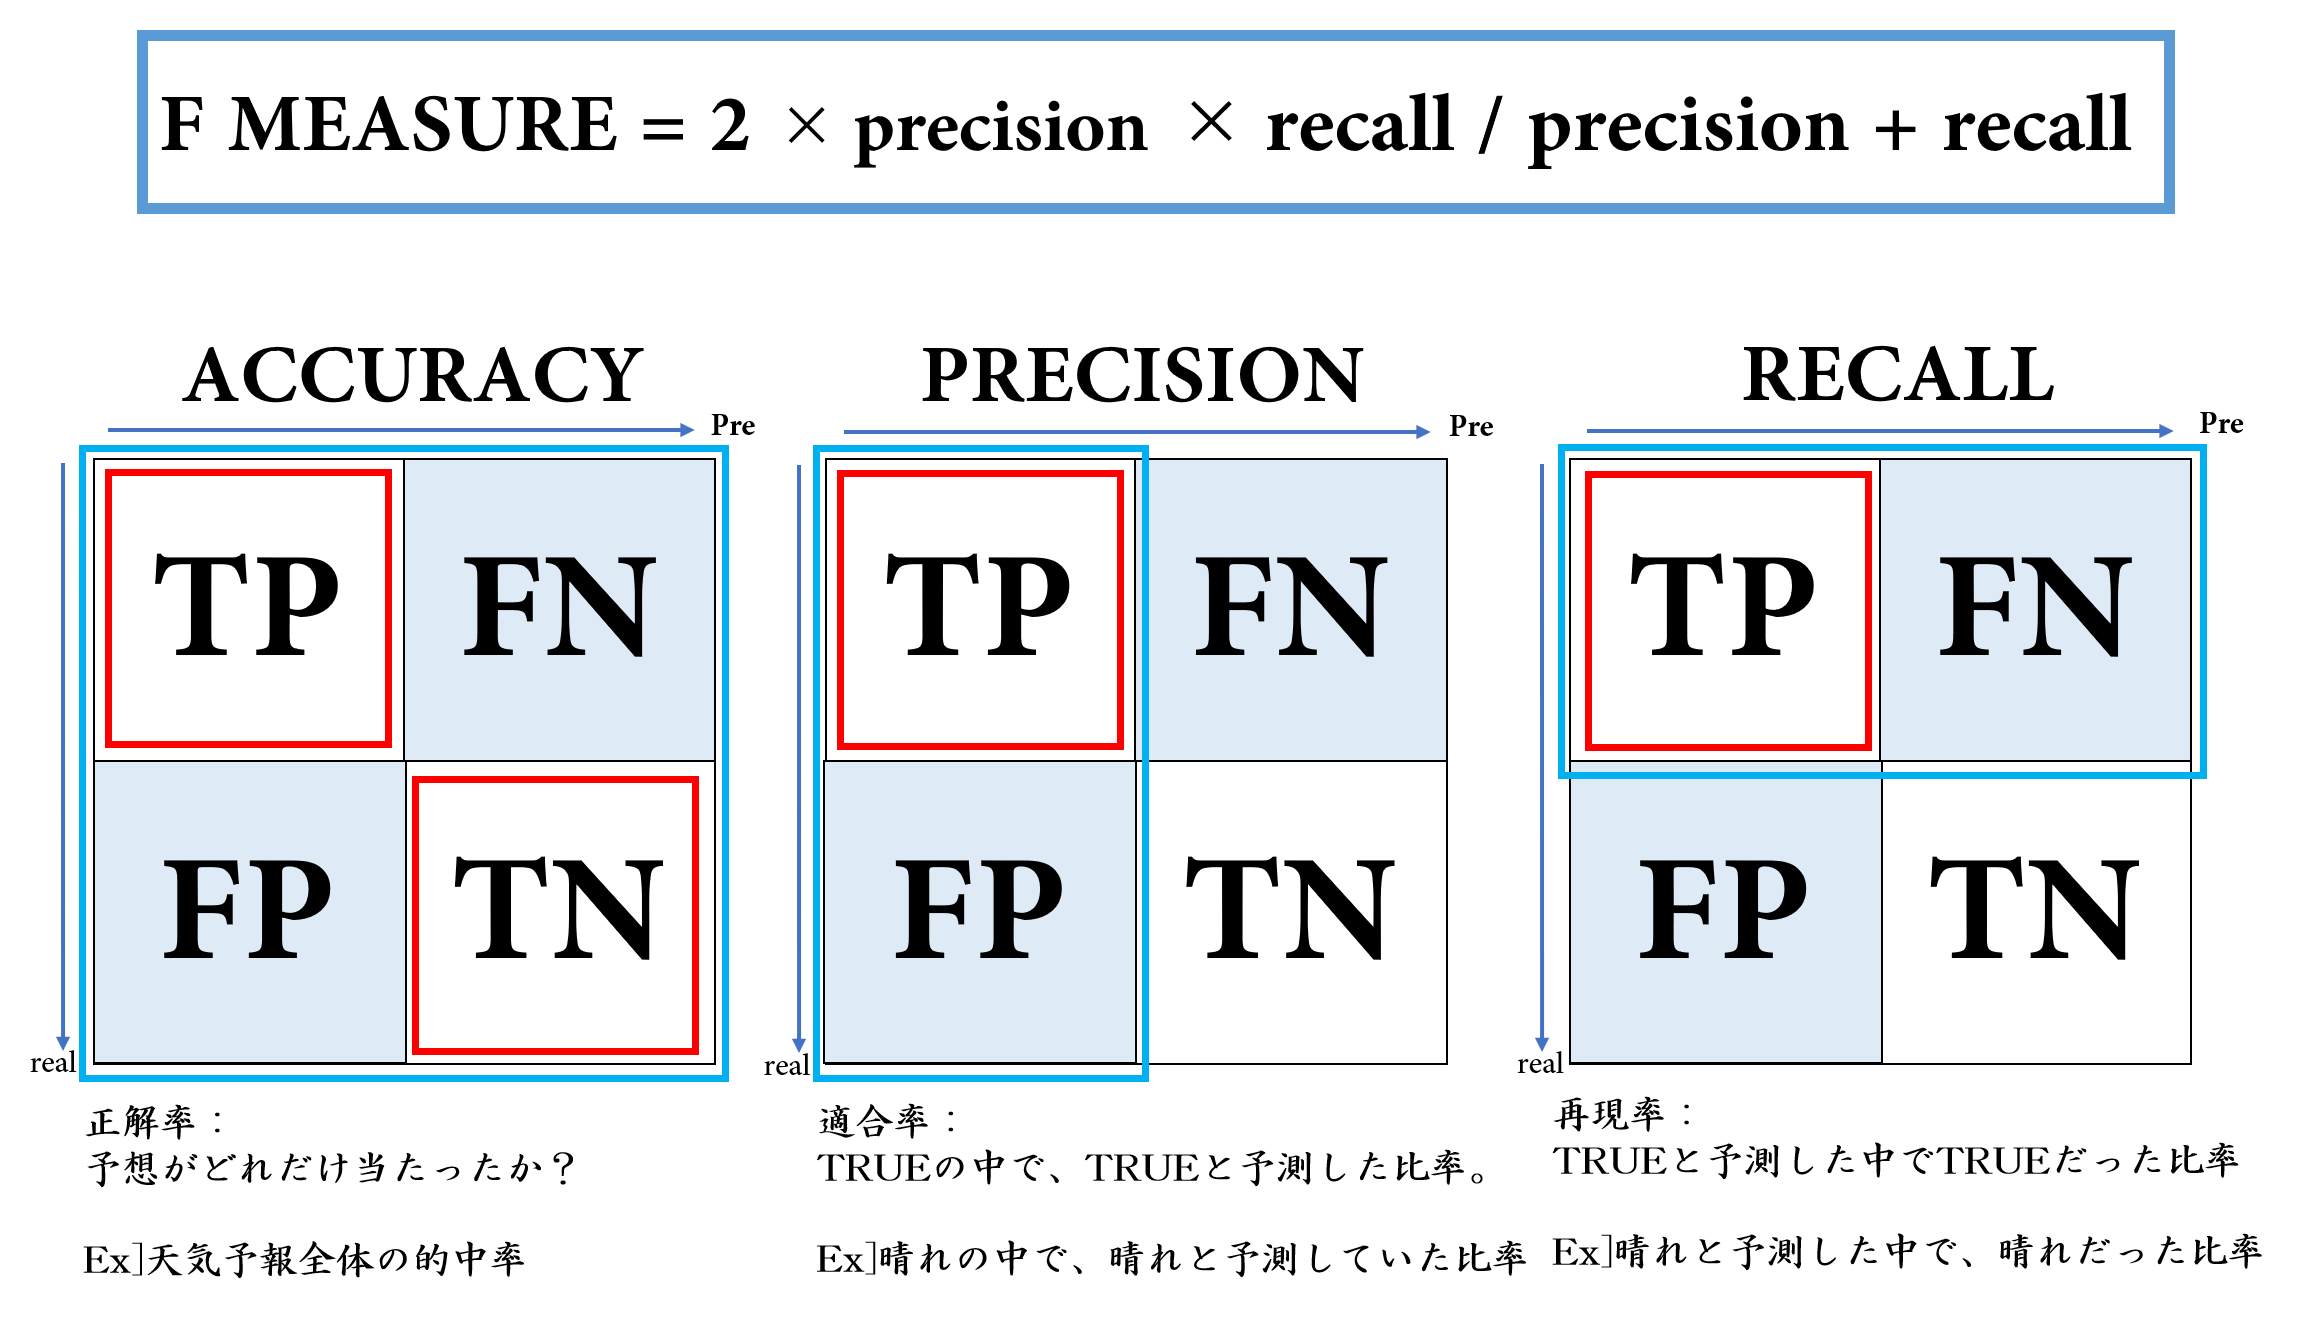

In [29]:
import os
import os.path
from IPython.display import display
from PIL import Image

path = "apr.png"
display(Image.open(path))

[accuracy] 
$
(TP + TN)/(TP + TN + FP + FN)
$

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred_three)

0.8666666666666667

In [32]:
accuracy_score(y_test, y_pred_five)

0.9

In [33]:
accuracy_score(y_test, y_pred_one)

0.8666666666666667

[recall] 
$
(TP)/(TP + FN)
$

In [78]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_three)

0.8333333333333334

In [79]:
recall_score(y_test, y_pred_five)

0.8888888888888888

In [80]:
recall_score(y_test, y_pred_one)

0.8888888888888888

[precision] 
$
(TP)/(TP + FP)
$

In [37]:
from sklearn.metrics import precision_score

In [81]:
precision_score(y_test, y_pred_three)

0.9375

In [82]:
precision_score(y_test, y_pred_five)

0.9411764705882353

In [83]:
precision_score(y_test, y_pred_one)

0.8888888888888888

[F measure] 
$
(2*precision*recall)/(precision + recall)
$

In [84]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_three)  

0.8823529411764706

In [85]:
f1_score(y_test, y_pred_five)  

0.9142857142857143

In [86]:
f1_score(y_test, y_pred_one)  

0.8888888888888888

In [87]:
"""

get scores: accuracy, pecision, recall, F measure

"""
def get_scores(y_test, y_pred):
    scores_array = np.hstack((accuracy_score(y_test, y_pred), 
                             precision_score(y_test, y_pred),
                             recall_score(y_test, y_pred),
                             f1_score(y_test, y_pred)))
    return scores_array
    
get_scores(y_test, y_pred_one)

array([0.86666667, 0.88888889, 0.88888889, 0.88888889])

[Mixing matrix]
##### TP: True Positive
##### FN: False Negative
##### FP: False Positive
##### TN: True Negative

In [67]:
from sklearn.metrics import confusion_matrix
# output the matrix
confusion_matrix(y_test, y_pred_three)

array([[15,  3],
       [ 1, 11]], dtype=int64)

In [45]:
confusion_matrix(y_test, y_pred_five)

array([[16,  2],
       [ 1, 11]], dtype=int64)

In [46]:
confusion_matrix(y_test, y_pred_one)

array([[16,  2],
       [ 2, 10]], dtype=int64)

### 6) Visualization

In [161]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the decision area of the model learned by binary classification with two dimensional 
    feature quantity.
     The color of the background is drawn from the estimated value by the learned model.
     The point of the scatter diagram is learning data.

     Parameters
     ------------------
     X_train: ndarray, shape (n_samples, 2)
         Characteristic quantity of learning data
     y_train: ndarray, shape (n_samples,)
         Correct value of learning data
     model: object
         **** Insert Instantus of the learned model
     step: float, (default: 0.1)
         Set interval to calculate estimated value
     title: str
         Give the text of the title of the graph
     xlabel, ylabel: str
         Give sentences of axis labels
     target_names =: list of str
         Give a list of legends
    """
    fig = plt.figure(figsize=(20, 15))
    
    # setting
    scatter_color = ['red', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    fig.patch.set_facecolor('blue')
    fig.patch.set_alpha(0.1)
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='g', linewidths=5, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=150, color=scatter_color[i], label=target_names[i], 
                    marker='x', alpha=0.7)
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

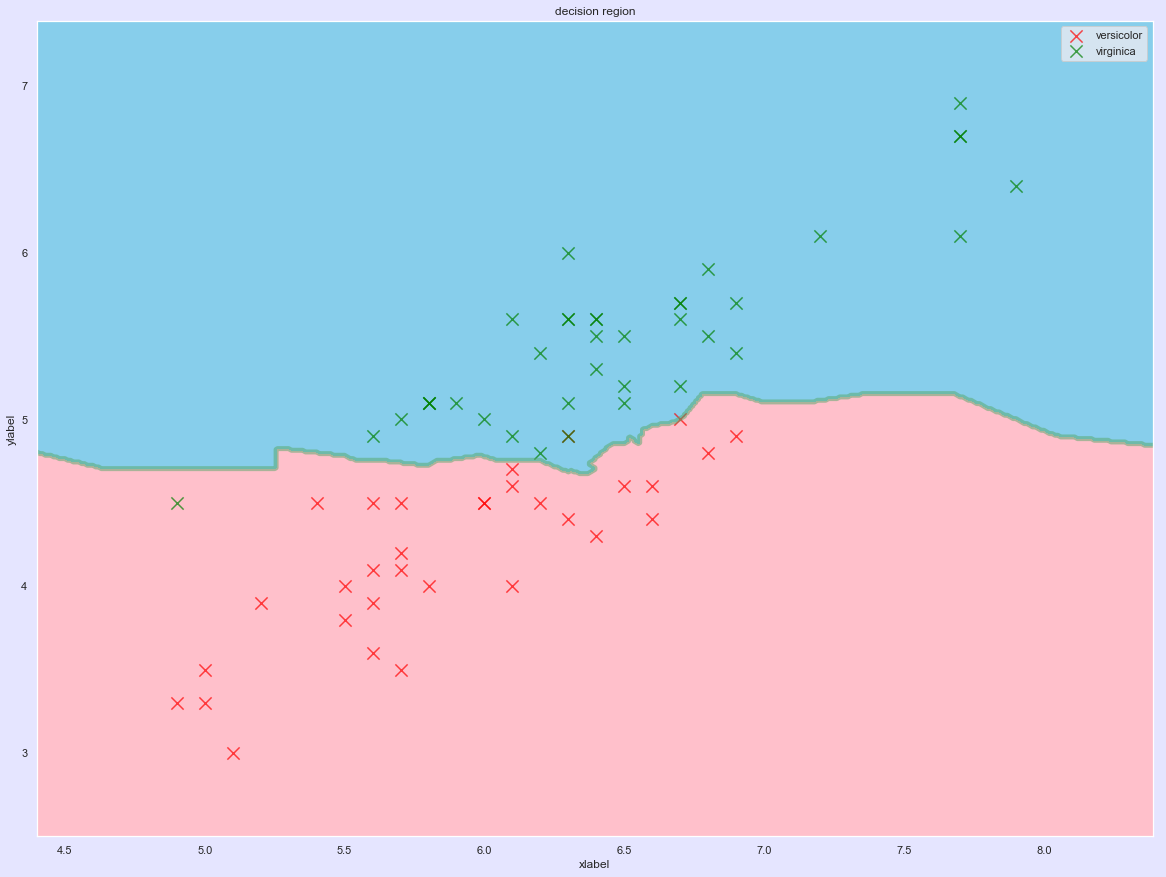

In [162]:
decision_region(X_train, y_train, neigh_three)

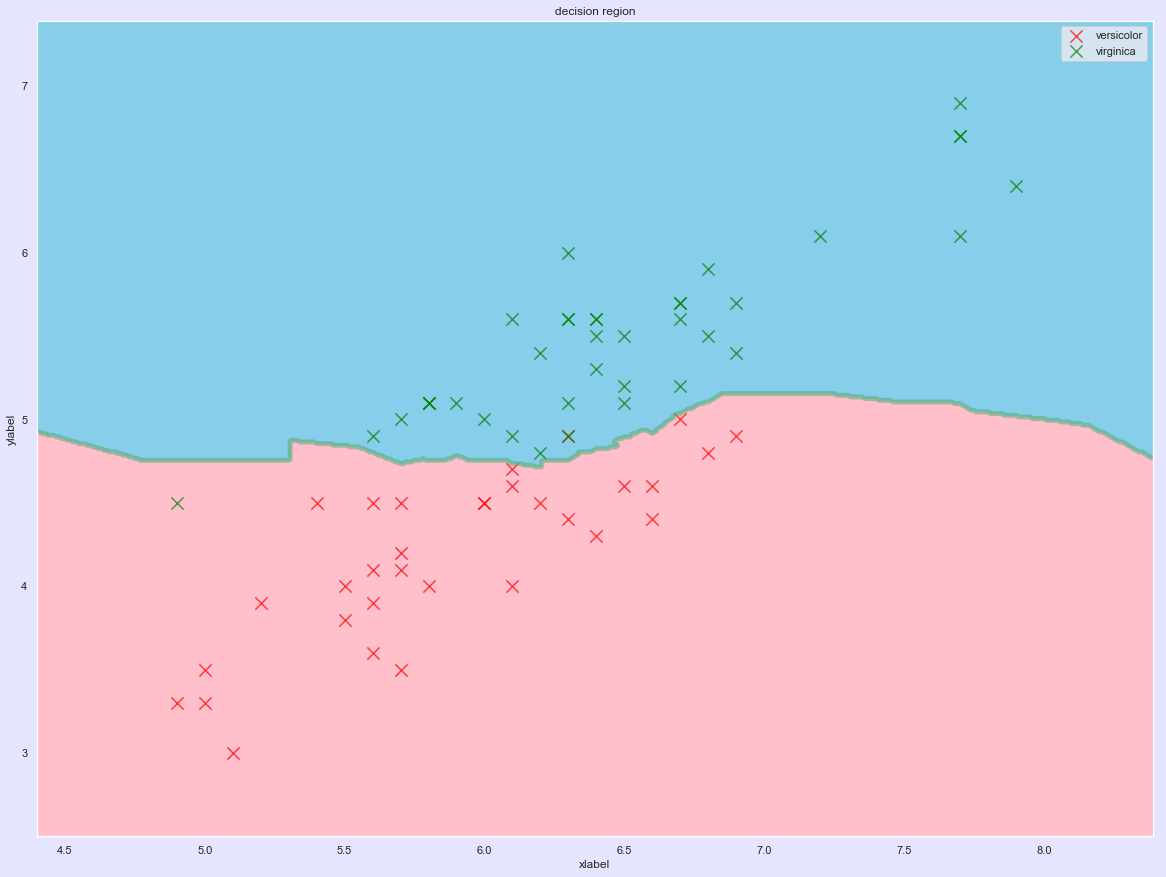

In [163]:
decision_region(X_train, y_train, neigh_five)

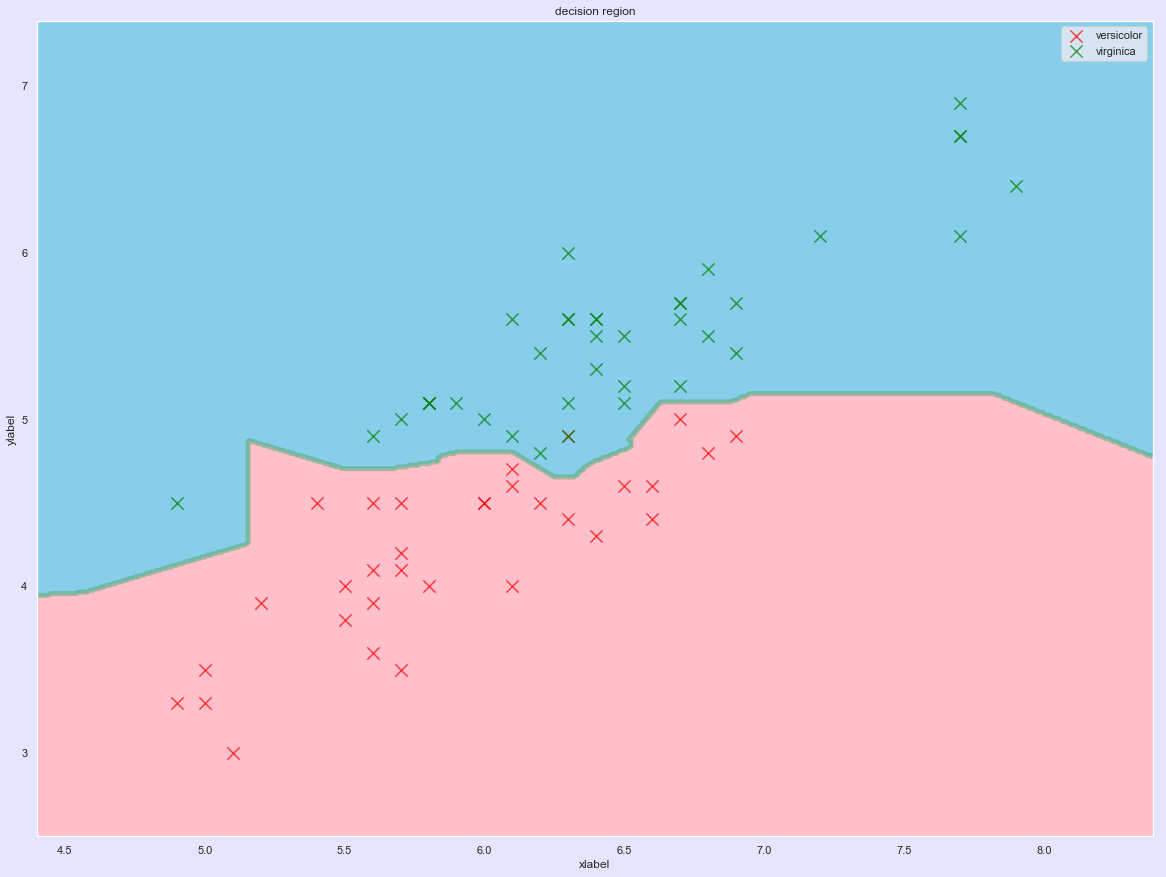

In [164]:
decision_region(X_train, y_train, neigh_one)

### 7) Learning other methods

[KNeighborsClassifier]

In [165]:
# graf is above

# get scores KN
score_KN = get_scores(y_test, y_pred_three)

[LogisticRegression]

In [166]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# train
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LR_pred = model_LR.predict(X_test)

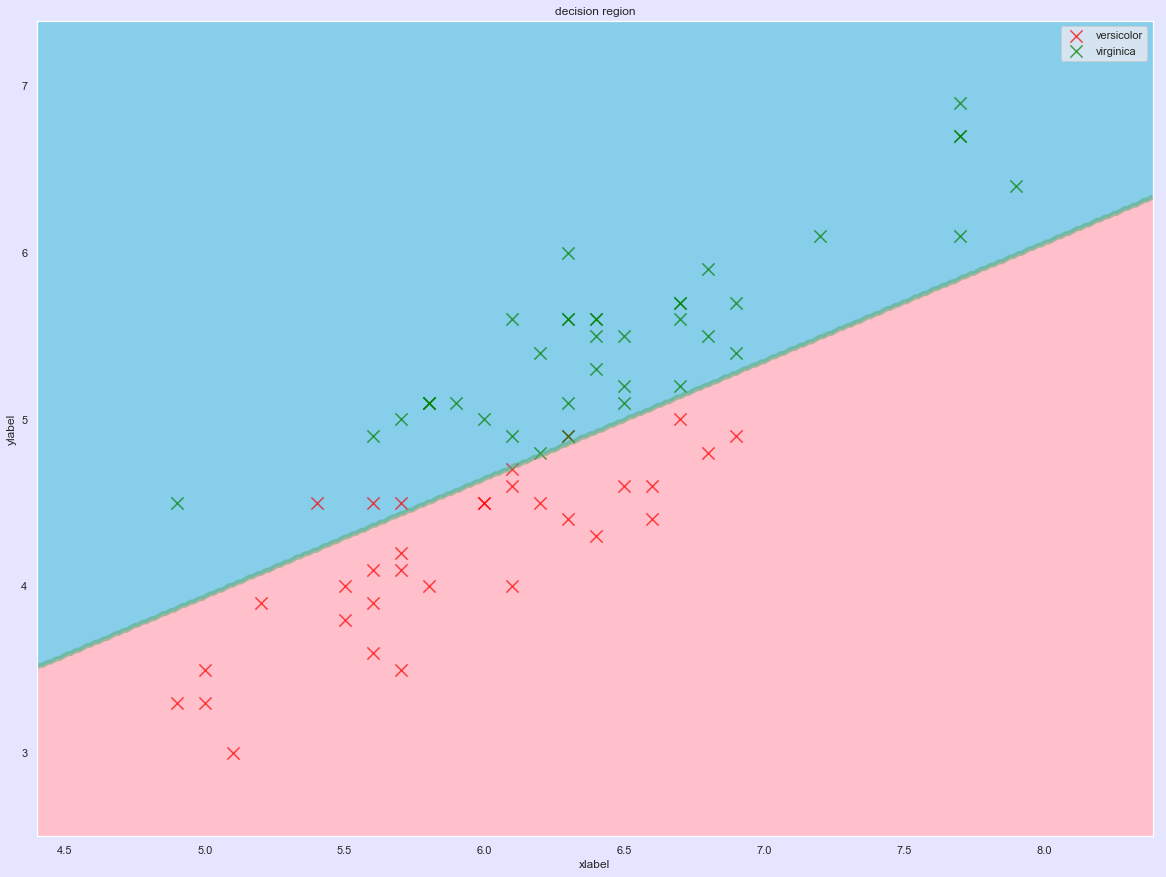

In [167]:
decision_region(X_train, y_train, model_LR)

In [170]:
# get scores LogisticRegression
score_LR = get_scores(y_test, LR_pred)

[SVC]

In [172]:
import numpy as np
from sklearn.svm import SVC

model_SVC = SVC()
model_SVC.fit(X_train, y_train)

score_SVC = SVC_model.score(X_train, y_train)

SVM_pred = model_svc.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

[DecisionTreeClassifier]

In [54]:
from sklearn import tree
import graphviz 

clf = tree.DecisionTreeClassifier()
clf_DT = clf.fit(X, y)

score_DT = clf_DT.score(X_test, y_test)

dot_data = tree.export_graphviz(clf_DT, out_file=None) 
graph = graphviz.Source(dot_data)

# graph.render("sample")

1.0


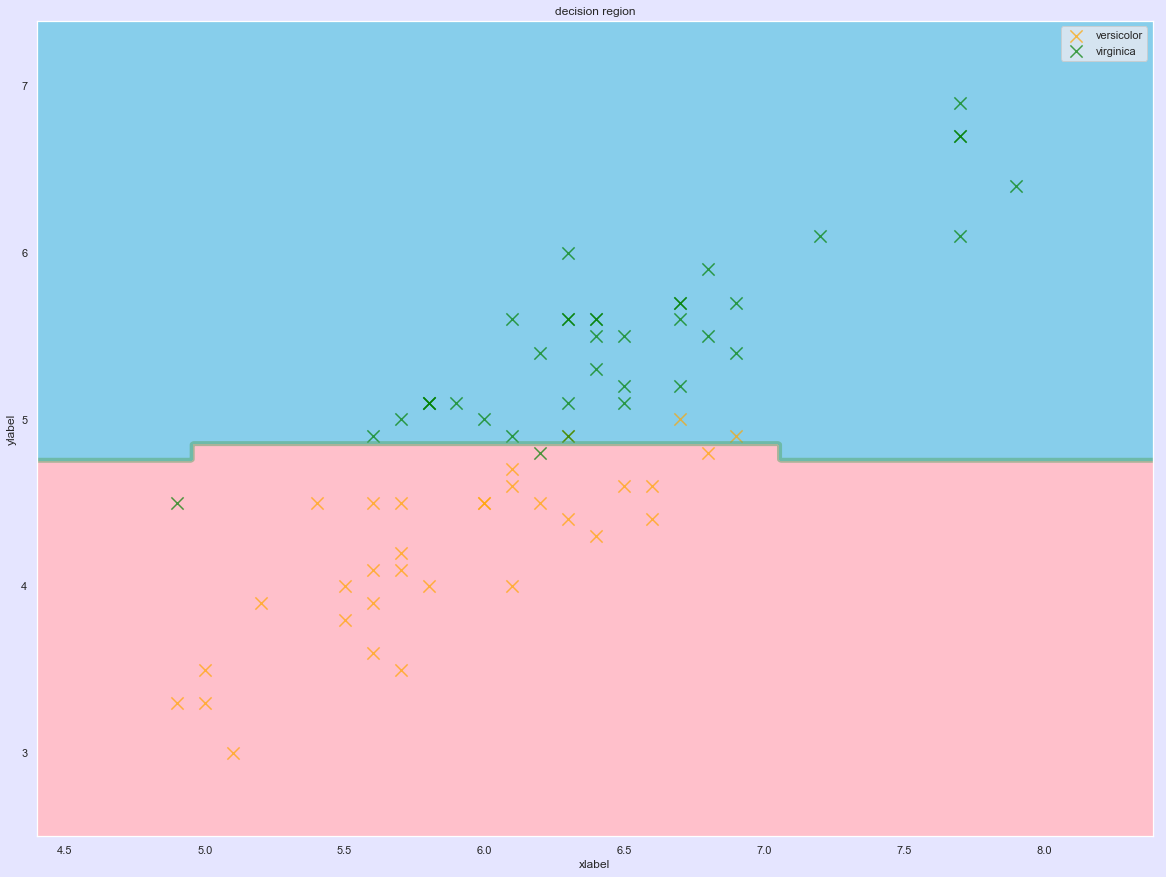

In [149]:
print(score_DT)
decision_region(X_train, y_train, clf)

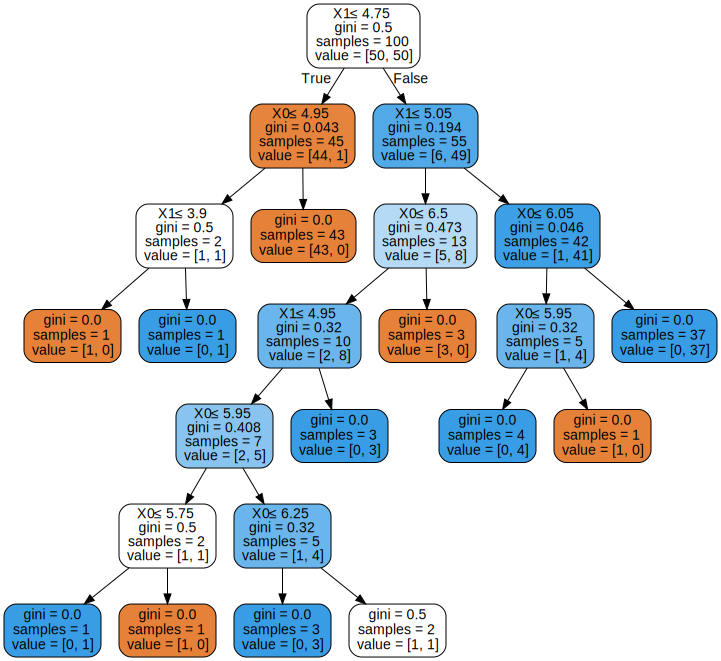

In [56]:
dot_data = tree.export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                     special_characters=True)   # feature_names=iris.feature_names, class_names=iris.target_names, 
graph = graphviz.Source(dot_data)  
graph 

[Random Forest]

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

0.9333333333333333


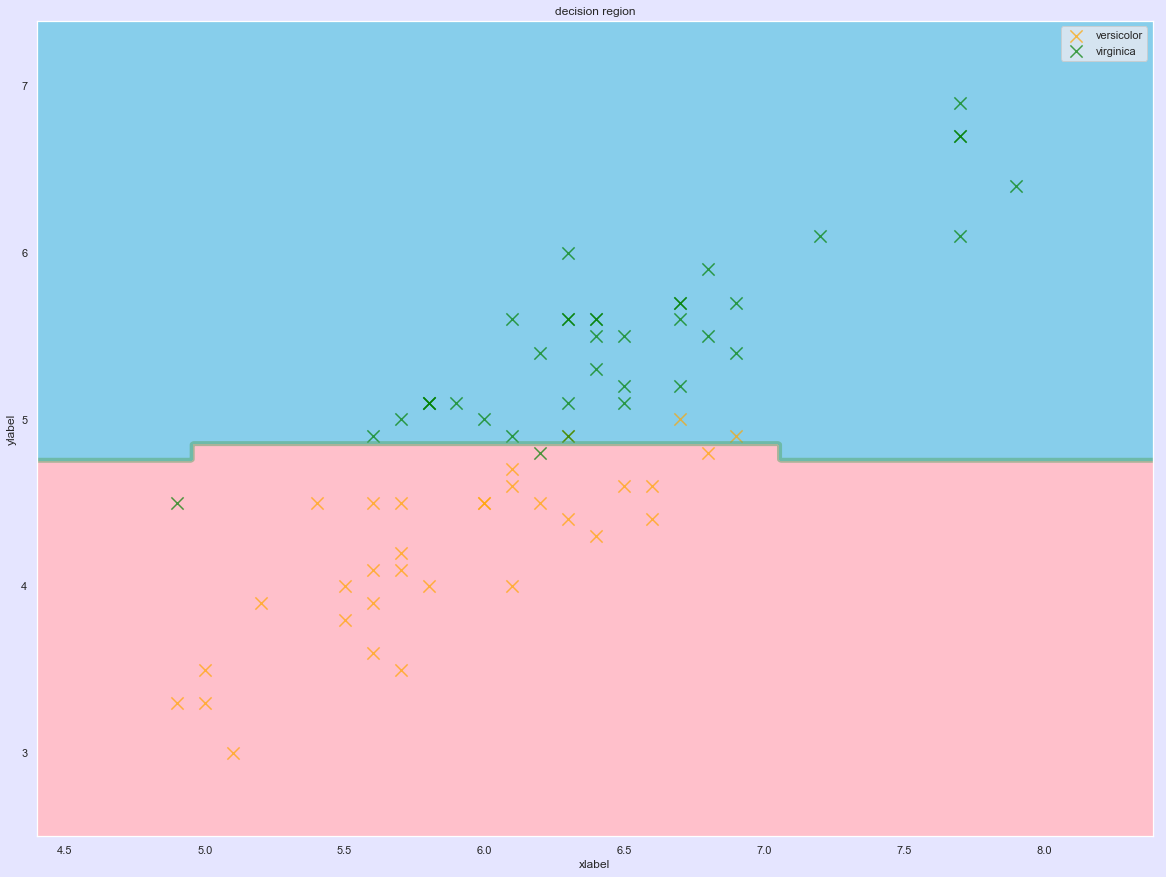

In [150]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
RF_model = clf.fit(X, y)

score_RF = RF_model.score(X_test, y_test)

print(score_RF)
decision_region(X_train, y_train, RF_model)

最近傍法では、
ロジスティック回帰
SVM
決定木
ランダムフォレスト

### 8) Advance task/ Meaning of each parameter

### 9) Advance task/ Comparison of standardization 

### 10) Advance task/ Objective variables, a method with high accuracy 